In [5]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [8]:
with open("./data/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [9]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 30
history = model.fit(training_padded,
                    training_labels,
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6720 - accuracy: 0.5666 - val_loss: 0.6151 - val_accuracy: 0.7277
Epoch 2/30
625/625 - 1s - loss: 0.4632 - accuracy: 0.8170 - val_loss: 0.3956 - val_accuracy: 0.8380
Epoch 3/30
625/625 - 1s - loss: 0.3244 - accuracy: 0.8706 - val_loss: 0.3600 - val_accuracy: 0.8469
Epoch 4/30
625/625 - 1s - loss: 0.2701 - accuracy: 0.8932 - val_loss: 0.3443 - val_accuracy: 0.8565
Epoch 5/30
625/625 - 1s - loss: 0.2330 - accuracy: 0.9110 - val_loss: 0.3643 - val_accuracy: 0.8425
Epoch 6/30
625/625 - 1s - loss: 0.2058 - accuracy: 0.9208 - val_loss: 0.3500 - val_accuracy: 0.8498
Epoch 7/30
625/625 - 2s - loss: 0.1834 - accuracy: 0.9306 - val_loss: 0.3636 - val_accuracy: 0.8511
Epoch 8/30
625/625 - 2s - loss: 0.1641 - accuracy: 0.9396 - val_loss: 0.3683 - val_accuracy: 0.8548
Epoch 9/30
625/625 - 2s - loss: 0.1488 - accuracy: 0.9440 - val_loss: 0.3834 - val_accuracy: 0.8538
Epoch 10/30
625/625 - 1s - loss: 0.1342 - accuracy: 0.9520 - val_loss: 0.4026 - val_accuracy: 0.8498

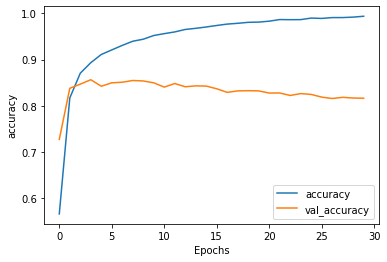

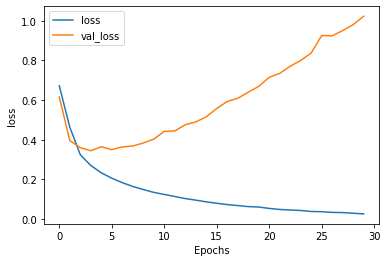

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [24]:
sentence = ["mom starting to fear son's web series closest thing she will have to grandchild","granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
output_logits = model.predict(padded)


pred = np.argmax(output_logits, axis=1)
print(pred)

[0 0 0]
